In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import Ridge
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('..\Initial_data\K5L1_2\K5L1_2_cor.csv', ";")
df

,K5PS14_1.PV,K5PS14_2.PV,K5L1_1.PV,K5L1_2.PV,K5L1_3.PV,K5L1_4.PV,K5P5_1.PV,K5P5_2.PV,K5BSB_1.PV,K5BSB_2.PV,...,K5T2_1.PV,K5T2_2.PV,K0P102_1.PV,K0T104_2.PV,K5F6X.PV,K5T16.PV,K5T15.PV,K5P8.PV,K5T17.PV,K5L2.PV
0,4.110403,4.224950,13.786170,4.584234,1.391578,312.5545,-40.09245,-39.37344,38.50135,55.80167,...,418.8025,414.9125,4.090837,399.5566,25.91725,96.04542,109.29330,3.947831,125.8089,272.8238
1,4.112575,4.227241,11.901750,3.316688,-0.645750,312.5571,-39.79466,-39.14466,38.05667,55.72771,...,418.4803,414.5512,4.092775,399.6491,25.95287,95.98844,109.34350,3.949697,125.8541,272.7920
2,4.113778,4.228291,10.791700,2.277516,-1.903453,312.5505,-40.09753,-39.45195,38.08927,55.77531,...,418.1625,414.1656,4.094706,399.5097,25.87472,95.92969,109.41330,3.949778,125.8552,272.5587
3,4.115534,4.230028,10.178770,1.721016,-2.264719,312.5371,-40.04427,-40.01524,38.10891,55.77896,...,418.0356,414.0303,4.096784,399.6128,25.80683,95.83218,109.49460,3.954266,125.7343,273.4935
4,4.119669,4.234331,10.185660,1.616016,-2.435016,312.5414,-39.67149,-38.28672,38.09208,55.95422,...,417.9797,413.9844,4.102347,399.7712,25.68059,95.74865,109.53500,3.957666,125.5335,273.1667
5,4.122612,4.237253,10.464890,1.892953,-1.916906,312.5427,-40.28607,-39.92331,38.01828,55.64625,...,417.9188,413.9394,4.104703,399.7647,25.76429,95.65708,109.56730,3.959622,125.3547,273.5115
6,4.123275,4.238062,11.269780,2.677500,-1.340062,312.5768,-39.72253,-39.39857,37.93375,55.77026,...,417.9634,413.9887,4.106544,399.8065,25.67102,95.61938,109.48540,3.959034,125.1298,274.2479
7,4.123269,4.238084,11.791170,2.978391,-0.501375,312.5378,-39.68307,-38.91445,38.18781,55.74401,...,418.1478,414.1822,4.106641,399.7253,25.65206,95.61208,109.42620,3.960341,125.0107,273.3688
8,4.122297,4.236731,12.864800,4.086141,0.219844,312.5417,-39.44596,-39.29531,38.19823,55.40136,...,418.3853,414.4325,4.103781,399.7350,25.80089,95.61771,109.31940,3.958441,124.9419,273.9463
9,4.117709,4.232606,13.293000,4.496297,0.558469,312.5748,-40.14557,-39.49180,38.29672,55.69167,...,418.4241,414.4856,4.100587,399.6288,25.67075,95.63073,109.22370,3.952312,124.9088,273.0702


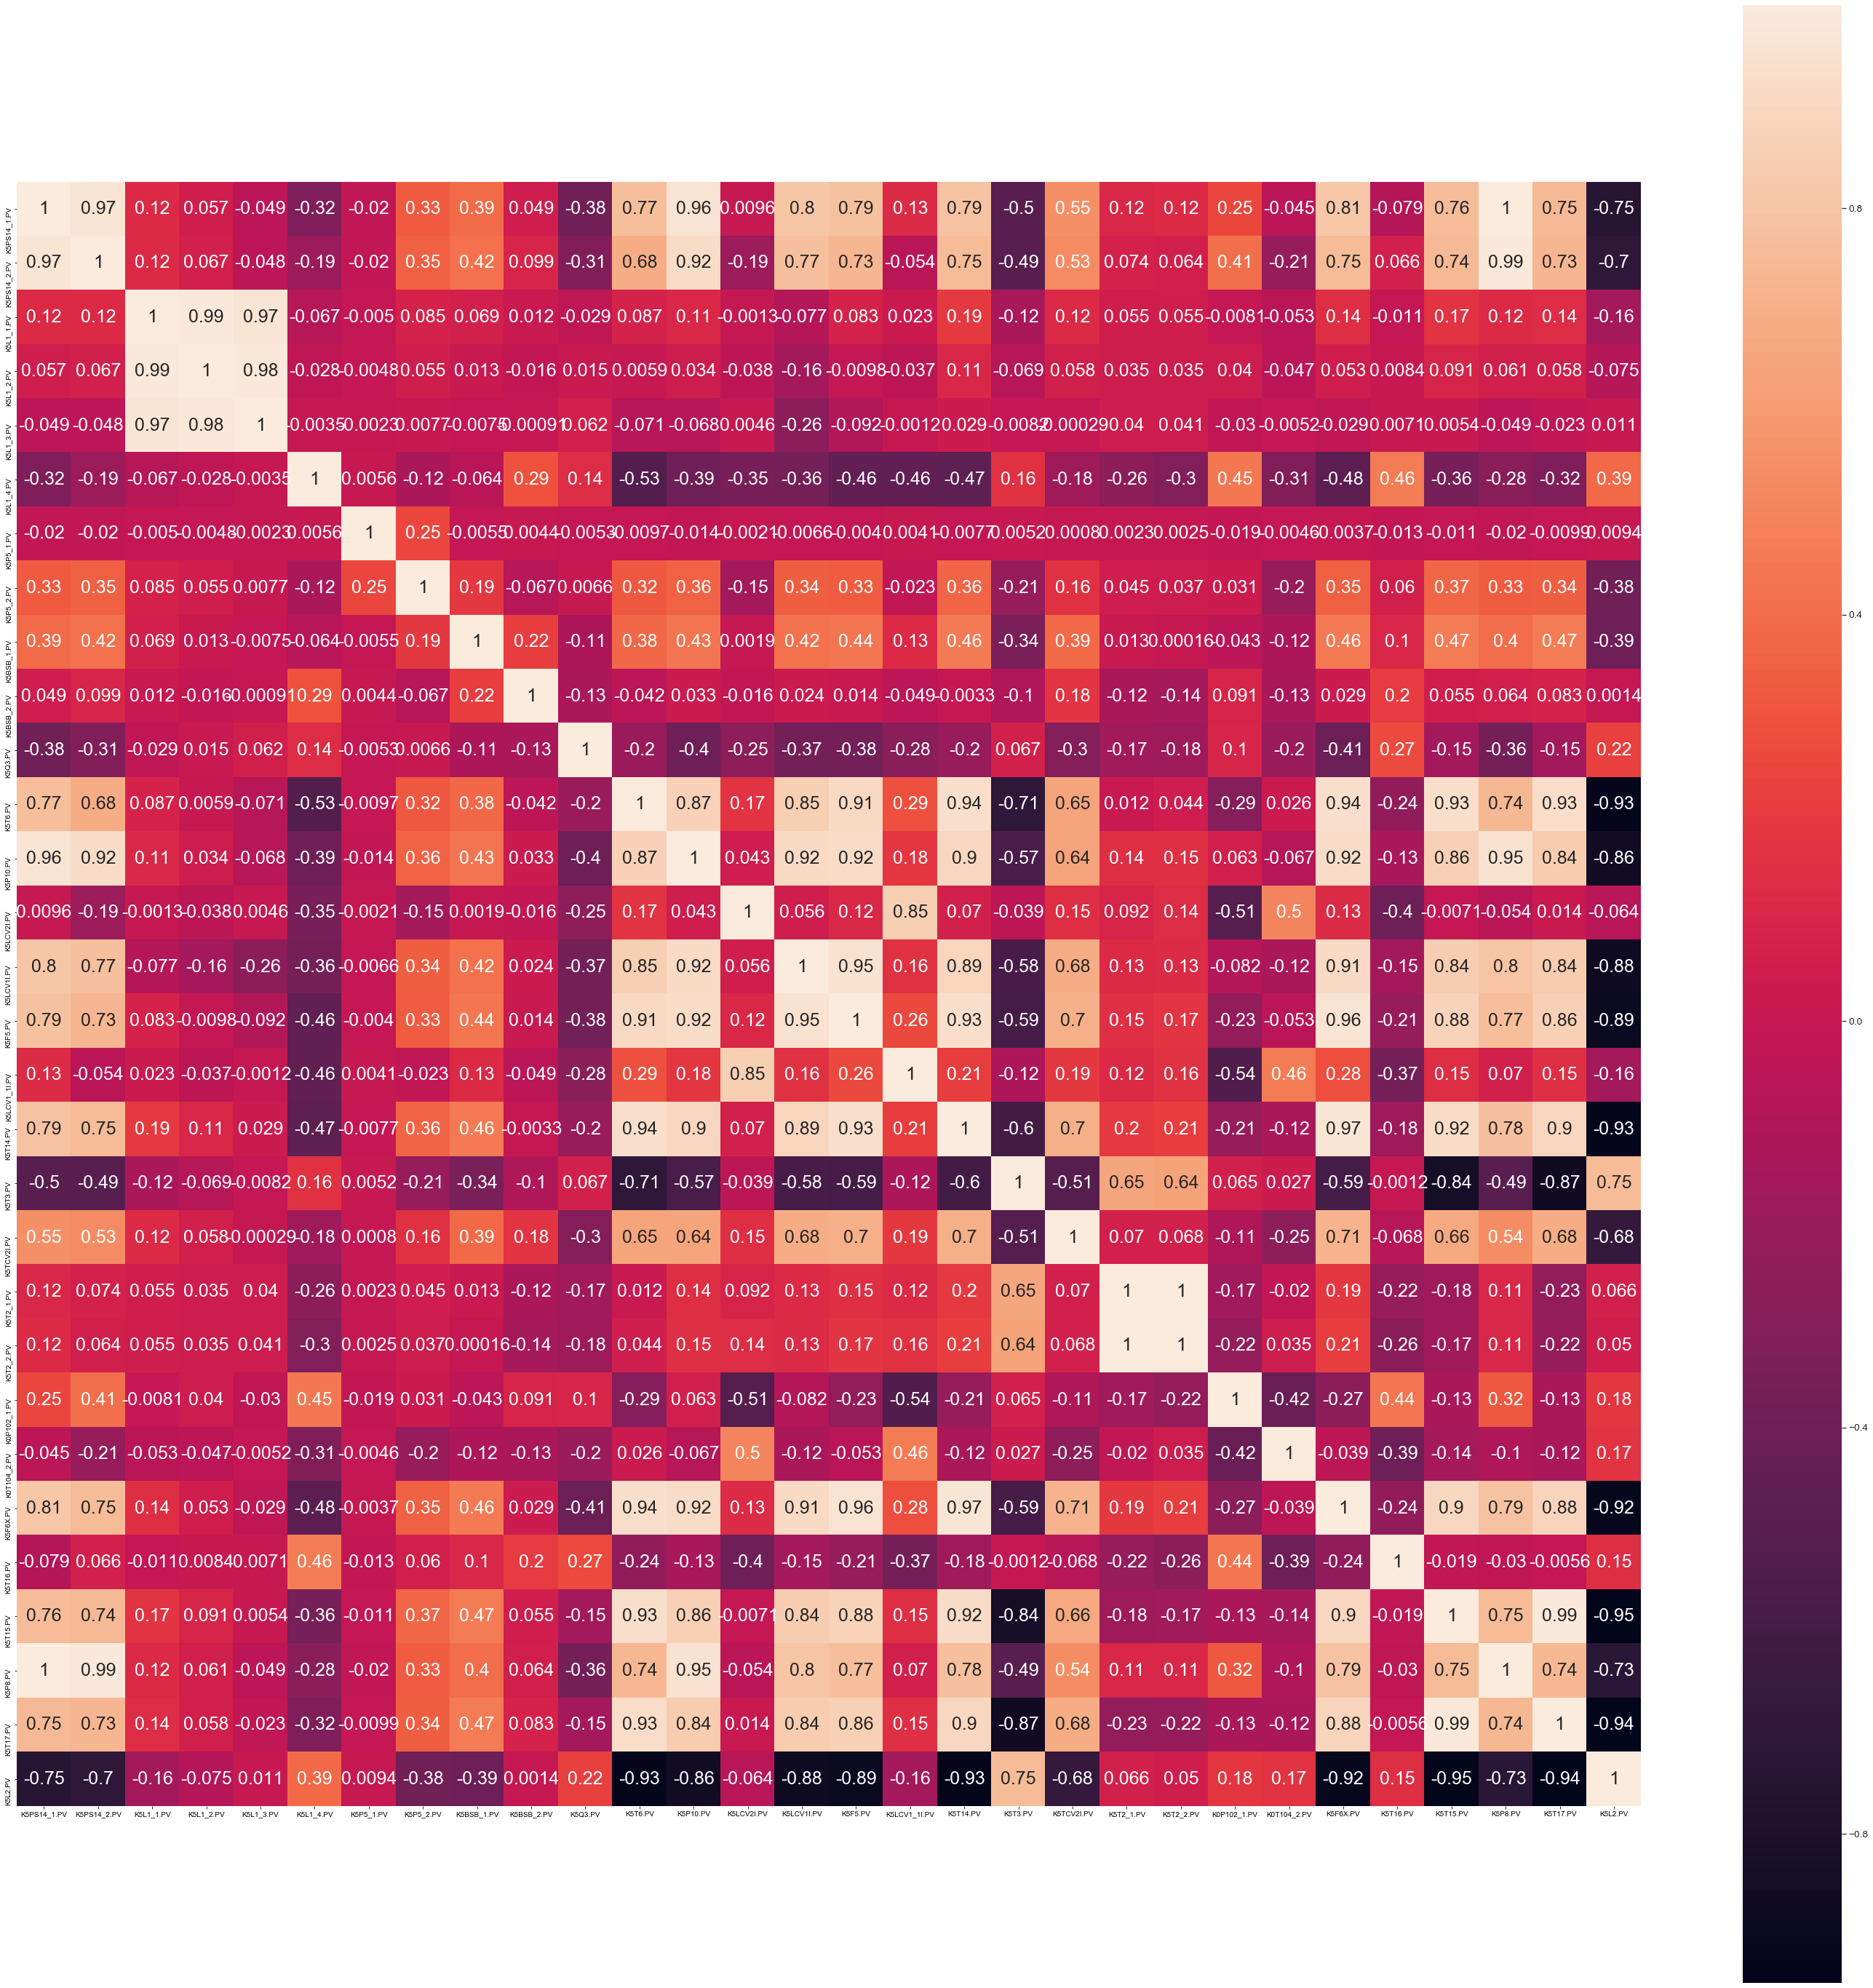

In [3]:
corrmat = df.corr()
fig,ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, annot=True, annot_kws={'size':25}, square=True)

In [4]:
df = pd.read_csv('..\Initial_data\K5L1_2\K5L1_2.csv', ";")
df

,K5L1_2.PV,K5F5.PV,K5F6X.PV
0,9.674109,33.50978,30.49204
1,9.635062,33.45978,29.91130
2,9.605860,39.06009,31.88136
3,9.603890,38.97546,31.28910
4,9.571078,21.93259,18.02084
5,9.563531,33.57830,30.90895
6,9.556641,33.37739,30.17063
7,9.413906,34.84178,29.84816
8,9.338109,36.05405,31.66335
9,9.328266,26.69000,21.32633


In [5]:
df=df.dropna()
df=df.round(3)
df=df.drop_duplicates(["K5L1_2.PV"])
df=df.drop_duplicates(["K5F5.PV"])
df=df.drop_duplicates(["K5F6X.PV"])
df

,K5L1_2.PV,K5F5.PV,K5F6X.PV
0,9.674,33.510,30.492
1,9.635,33.460,29.911
2,9.606,39.060,31.881
3,9.604,38.975,31.289
4,9.571,21.933,18.021
5,9.564,33.578,30.909
6,9.557,33.377,30.171
7,9.414,34.842,29.848
8,9.338,36.054,31.663
9,9.328,26.690,21.326


In [6]:
y = df.drop(['K5F5.PV', "K5F6X.PV"], axis=1)
x = df.drop(['K5L1_2.PV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 25)

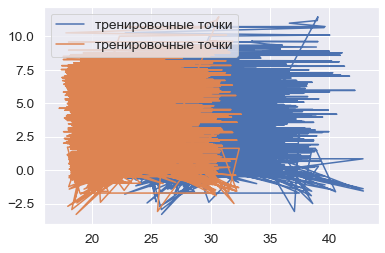

In [7]:
plt.plot(x, y, label = 'тренировочные точки') 
plt.legend(loc='upper left') 
plt.show()

In [8]:
lasso = MultiTaskLassoCV(cv=5, random_state=10).fit(X_train, y_train)
lasso.score(x, y)
clf = Ridge(alpha=0.5)
clf.fit(X_train, y_train)
#y_pr=clf.predict(df1)
#plt.scatter(x, y, label = 'тренировочные точки') 
#plt.plot(task, y_pr, label = 'квадратичная подгонка') 
#plt.legend(loc='upper left') 
#plt.show()
clf.score(X_test, y_test)

0.04687645471572899

In [9]:
import pickle
filename = '../model/K5L1_2.sav'
pickle.dump(clf, open(filename, 'wb'))

In [10]:
loaded_model = pickle.load(open("../model/K5L1_2.sav", 'rb'))

In [11]:
task2 = {'K5F5.PV':[40.9], 
        'K5F6X.PV':[32.24]}
df2 = pd.DataFrame(data=task2)
df2

,K5F5.PV,K5F6X.PV
0,40.9,32.24


In [12]:
loaded_model.predict(df2)

array([[3.62416909]])